In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor as xgb
from sklearn import metrics

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace = True)

In [6]:
mode_of_Outlet_size = df.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc = (lambda x :x.mode()[0]))
mode_of_Outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [7]:
miss_values = df['Outlet_Size'].isnull()
miss_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [8]:
df.loc[miss_values, 'Outlet_Size'] = df.loc[miss_values, 'Outlet_Type'].apply(lambda x : mode_of_Outlet_size[x])
df['Outlet_Size']

0       Medium
1       Medium
2       Medium
3        Small
4         High
         ...  
8518      High
8519     Small
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [9]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

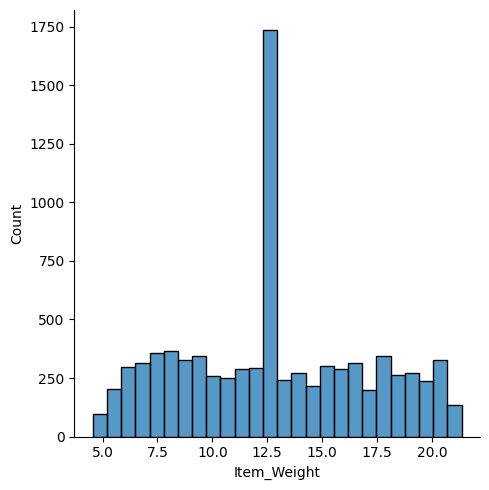

In [10]:
# Item_Weight distribution 
sns.displot(df['Item_Weight'])
plt.show()

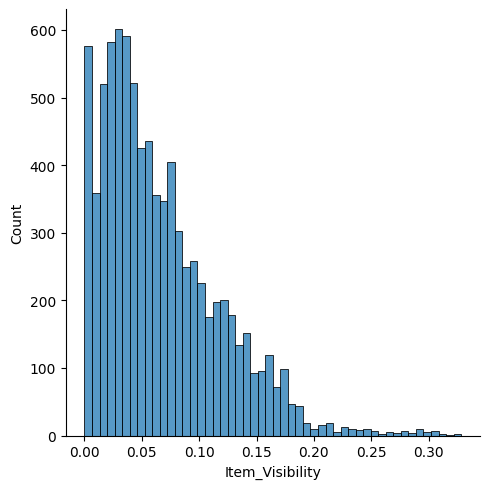

In [11]:
# Item_Visibility distribution 
sns.displot(df['Item_Visibility'])
plt.show()

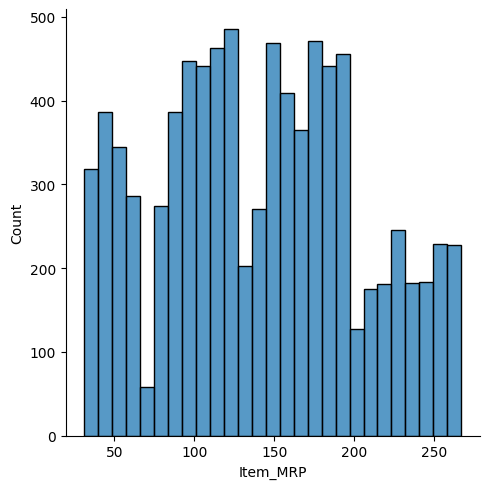

In [12]:
# Item_MRP distribution 
sns.displot(df['Item_MRP'])
plt.show()

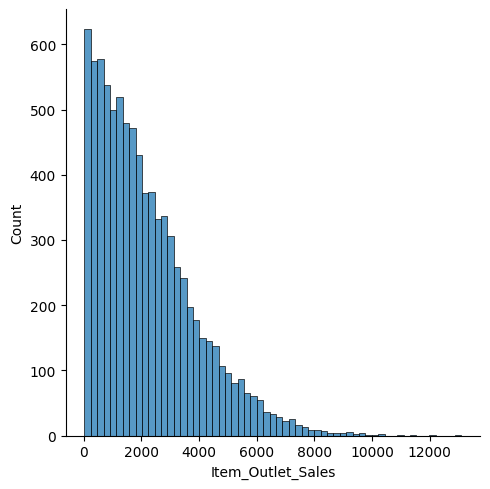

In [13]:
# Item_Outlet_Sales distribution 
sns.displot(df['Item_Outlet_Sales'])
plt.show()

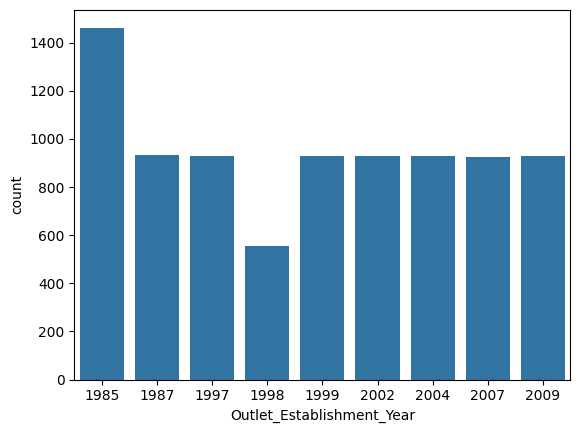

In [14]:
# Outlet_Establishment_Year distribution 
sns.countplot(x ='Outlet_Establishment_Year', data = df)
plt.show()

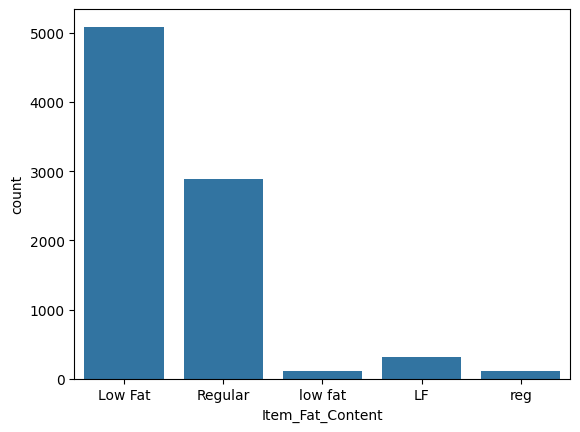

In [15]:
# Item_Fat_Content distribution 
sns.countplot(x ='Item_Fat_Content', data = df)
plt.show()

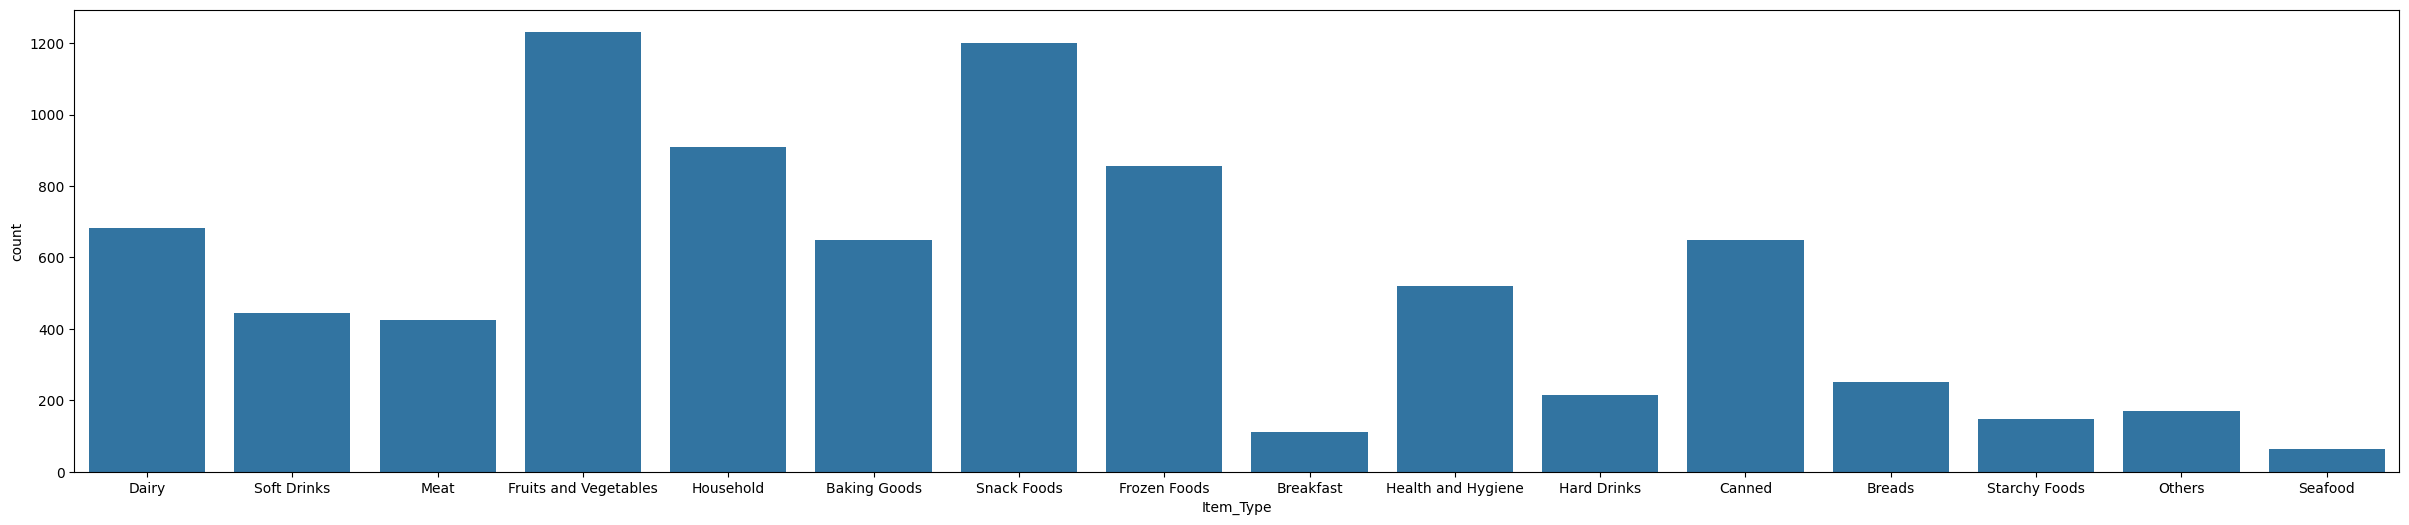

In [16]:
# Item_Type distribution 
plt.figure(figsize = (30,6))
sns.countplot(x ='Item_Type', data = df)
plt.show()

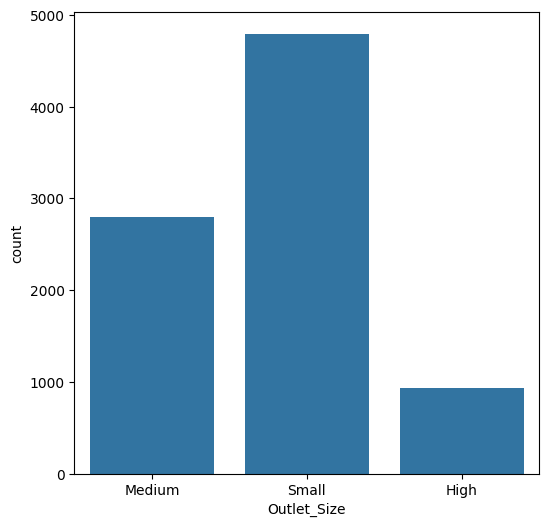

In [17]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=df)
plt.show()

In [18]:
df.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [19]:
encoder = LabelEncoder()

In [20]:
columns = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for col in columns:
    df[col] = encoder.fit_transform(df[col])

In [21]:
X = df.drop(columns=['Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [23]:
X.shape

(8523, 11)

## Model training

In [24]:
model = xgb().fit(X_train, y_train)

In [25]:
print('r squared error: ',metrics.r2_score(y_train, model.predict(X_train)))
print('mean absolute error: ',metrics.mean_absolute_error(y_train, model.predict(X_train)))

r squared error:  0.8824827393980437
mean absolute error:  423.57047939407687


In [26]:
print('r squared error: ',metrics.r2_score(y_test, model.predict(X_test)))
print('mean absolute error: ',metrics.mean_absolute_error(y_test, model.predict(X_test)))

r squared error:  0.47119114219768576
mean absolute error:  865.1619129771786


## Using tensorflow

In [27]:
import tensorflow as tf
import keras
from keras import layers

In [28]:
# Create a model that include the normalization layer
model = tf.keras.Sequential([
    layers.Input(shape = 11),
    layers.Normalization(),  
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

model.compile(loss='mae',
            optimizer="adam")
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
214/214 [==============================] - 3s 3ms/step - loss: 1310.2156
Epoch 2/100
214/214 [==============================] - 1s 3ms/step - loss: 1136.7307
Epoch 3/100
214/214 [==============================] - 1s 4ms/step - loss: 1033.1505
Epoch 4/100
214/214 [==============================] - 1s 3ms/step - loss: 1023.0571
Epoch 5/100
214/214 [==============================] - 1s 4ms/step - loss: 1024.8600
Epoch 6/100
214/214 [==============================] - 1s 3ms/step - loss: 1016.1957
Epoch 7/100
214/214 [==============================] - 0s 2ms/step - loss: 1013.3622
Epoch 8/100
214/214 [==============================] - 0s 2ms/step - loss: 1008.4140
Epoch 9/100
214/214 [==============================] - 0s 2ms/step - loss: 1006.4321
Epoch 10/100
214/214 [==============================] - 0s 2ms/step - loss: 1006.6671
Epoch 11/100
214/214 [==============================] - 0s 2ms/step - loss: 1001.2734
Epoch 12/100
214/214 [==============================] - 0s 2ms/

214/214 [==============================] - 0s 2ms/step - loss: 815.3147
Epoch 98/100
214/214 [==============================] - 0s 2ms/step - loss: 815.3508
Epoch 99/100
214/214 [==============================] - 1s 2ms/step - loss: 821.6415
Epoch 100/100
214/214 [==============================] - 1s 2ms/step - loss: 807.3743


In [29]:
model.evaluate(X_test, y_test)

54/54 [==============================] - 0s 2ms/step - loss: 835.5881


835.5880737304688